## Twitter sentimetal anlysis through  a sample of "rolex watches" tweets Using Artificial Neural Networks.


In [1]:
!pip install snscrape
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np

query = "rolex watch"
tweets = []
limit = 5000


for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    
    # print(vars(tweet))
    # break
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.username, tweet.content])
        
df = pd.DataFrame(tweets, columns=['Date','Username', 'Tweet'])
df.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Date,Username,Tweet
0,2022-06-28 12:12:25+00:00,aarngiri,@Crypto____Villa Woo you're rocking the Rolex ...
1,2022-06-28 12:11:56+00:00,gold__watches,Cartier 18k Solid Gold Date Pointer and Moon P...
2,2022-06-28 12:11:00+00:00,Gertsroyals,Zara &amp; Mike Tindall have been spotted at W...
3,2022-06-28 12:09:04+00:00,PrimeSiteUK,"#Watchmaster offers refurbished, certified #pr..."
4,2022-06-28 12:07:36+00:00,julian_troost,@GarethDennis @trashfuturepod A Rolex is still...


In [2]:
# Check random tweet
df['Tweet'][66]

'Rolex Day-Date 40 President Everose Gold Watch 228235 60th Anniversary Green Dial\n\nhttps://t.co/pFC8P1QQRL https://t.co/aGFkTDk8Me'

In [3]:
#df['Date'] = df['Date'].dt.strftime('%d')
#get rid of links and hashtags
df["Tweet"] = df["Tweet"].apply(lambda x : ' '.join([s for s in x.split(' ') if s.find('@') == -1 and s.find('www') == -1 and s.find('https') == -1]))

#get rid of non-ascii characters
df = df.replace(r'\W+', ' ', regex=True)
df['Tweet'][66]

'Rolex Day Date 40 President Everose Gold Watch 228235 60th Anniversary Green'

In [4]:
!pip install spacytextblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Next i carried out the sentimental analysis on the Tweets using the latest version of spacy
# installing it
!pip install spacytextblob
!pip install spacy
!python -m textblob.download_corpora
!python -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/p

In [6]:
# Next i run the sentiment analysis on the tweets and appended the score to our dataframe:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe("spacytextblob")

df['sentiment'] = df['Tweet'].apply(lambda x : nlp(x)._.polarity)
df = df.sort_values('sentiment').reset_index(drop=True)
df

,Date,Username,Tweet,sentiment
0,2022-06-17 11:53:10+00:00,Annj221,It s insane Is P Krill the one who is terrifie...,-1.0
1,2022-06-24 22:30:11+00:00,Derek83rd,he must be buying a ladies watch ain t no 7k R...,-1.0
2,2022-06-27 15:37:27+00:00,C2squaredComm,Watch People HATE This Seiko Comex Diver Rolex...,-0.8
3,2022-06-18 15:29:39+00:00,dianaarrozito,Rolex watches don t have the walkie talkie fea...,-0.8
4,2022-06-24 14:24:34+00:00,d34dr4661t,I won t even mention who this guy is He isn t ...,-0.8
...,...,...,...,...
4995,2022-06-27 14:37:00+00:00,gold__watches,EXCELLENT ROLEX VINTAGE WATCH BOX OUTER CARDBO...,1.0
4996,2022-06-20 07:34:52+00:00,XavierDupontde,At Retail Price the Best Entry Level Luxury Wa...,1.0
4997,2022-06-19 16:45:54+00:00,gold__watches,Vintage Tag Heuer Mechanical Stopwatch Running...,1.0
4998,2022-06-24 19:26:36+00:00,kokoshungsan,Mens Rolex Yachtmaster II Watch 116688 29 50 C...,1.0


In [7]:
df

,Date,Username,Tweet,sentiment
0,2022-06-17 11:53:10+00:00,Annj221,It s insane Is P Krill the one who is terrifie...,-1.0
1,2022-06-24 22:30:11+00:00,Derek83rd,he must be buying a ladies watch ain t no 7k R...,-1.0
2,2022-06-27 15:37:27+00:00,C2squaredComm,Watch People HATE This Seiko Comex Diver Rolex...,-0.8
3,2022-06-18 15:29:39+00:00,dianaarrozito,Rolex watches don t have the walkie talkie fea...,-0.8
4,2022-06-24 14:24:34+00:00,d34dr4661t,I won t even mention who this guy is He isn t ...,-0.8
...,...,...,...,...
4995,2022-06-27 14:37:00+00:00,gold__watches,EXCELLENT ROLEX VINTAGE WATCH BOX OUTER CARDBO...,1.0
4996,2022-06-20 07:34:52+00:00,XavierDupontde,At Retail Price the Best Entry Level Luxury Wa...,1.0
4997,2022-06-19 16:45:54+00:00,gold__watches,Vintage Tag Heuer Mechanical Stopwatch Running...,1.0
4998,2022-06-24 19:26:36+00:00,kokoshungsan,Mens Rolex Yachtmaster II Watch 116688 29 50 C...,1.0


In [8]:
# Convert the sentiments to categorical data where values more than 0 are positive sentiments and values less than 0 are negative sentiments.


df['sentiment'] = ['positive' if sentiment > 0 else 'negative' for sentiment in df['sentiment']]

# create binary to represent positive and negative.
df['sentiment'] = np.select(
    [
        df['sentiment'] == "positive",
        df['sentiment'] == "negative"
    ],
    [
        1,
        0
    ]
)
df

,Date,Username,Tweet,sentiment
0,2022-06-17 11:53:10+00:00,Annj221,It s insane Is P Krill the one who is terrifie...,0
1,2022-06-24 22:30:11+00:00,Derek83rd,he must be buying a ladies watch ain t no 7k R...,0
2,2022-06-27 15:37:27+00:00,C2squaredComm,Watch People HATE This Seiko Comex Diver Rolex...,0
3,2022-06-18 15:29:39+00:00,dianaarrozito,Rolex watches don t have the walkie talkie fea...,0
4,2022-06-24 14:24:34+00:00,d34dr4661t,I won t even mention who this guy is He isn t ...,0
...,...,...,...,...
4995,2022-06-27 14:37:00+00:00,gold__watches,EXCELLENT ROLEX VINTAGE WATCH BOX OUTER CARDBO...,1
4996,2022-06-20 07:34:52+00:00,XavierDupontde,At Retail Price the Best Entry Level Luxury Wa...,1
4997,2022-06-19 16:45:54+00:00,gold__watches,Vintage Tag Heuer Mechanical Stopwatch Running...,1
4998,2022-06-24 19:26:36+00:00,kokoshungsan,Mens Rolex Yachtmaster II Watch 116688 29 50 C...,1


In [9]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)
# Let's take a look at the updated text
df['cleaned_Tweets'] = pd.DataFrame(df.Tweet.apply(cleaned1))
df.head(10)

,Date,Username,Tweet,sentiment,cleaned_Tweets
0,2022-06-17 11:53:10+00:00,Annj221,It s insane Is P Krill the one who is terrifie...,0,it s insane is p krill the one who is terrifie...
1,2022-06-24 22:30:11+00:00,Derek83rd,he must be buying a ladies watch ain t no 7k R...,0,he must be buying a ladies watch ain t no rol...
2,2022-06-27 15:37:27+00:00,C2squaredComm,Watch People HATE This Seiko Comex Diver Rolex...,0,watch people hate this seiko comex diver rolex...
3,2022-06-18 15:29:39+00:00,dianaarrozito,Rolex watches don t have the walkie talkie fea...,0,rolex watches don t have the walkie talkie fea...
4,2022-06-24 14:24:34+00:00,d34dr4661t,I won t even mention who this guy is He isn t ...,0,i won t even mention who this guy is he isn t ...
5,2022-06-22 08:02:36+00:00,YiboRolex,Stop lying you don t hate a watch list,0,stop lying you don t hate a watch list
6,2022-06-17 05:08:24+00:00,SaGcwensa,How stupid can people be thieves who stole the...,0,how stupid can people be thieves who stole the...
7,2022-06-18 00:42:35+00:00,Lakitu886,cant watch sadly hopefully its boring,0,cant watch sadly hopefully its boring
8,2022-06-17 07:56:14+00:00,celeb99news,Million Pound Pawn guest cries I feel sick as ...,0,million pound pawn guest cries i feel sick as ...
9,2022-06-22 12:15:15+00:00,xuenou,Million Pound Pawn guest cries I feel sick as ...,0,million pound pawn guest cries i feel sick as ...


In [10]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)
# Let's take a look at the updated text
df['cleaned_Tweets2'] = pd.DataFrame(df.Tweet.apply(cleaned1))
df.head(10)

,Date,Username,Tweet,sentiment,cleaned_Tweets,cleaned_Tweets2
0,2022-06-17 11:53:10+00:00,Annj221,It s insane Is P Krill the one who is terrifie...,0,it s insane is p krill the one who is terrifie...,it s insane is p krill the one who is terrifie...
1,2022-06-24 22:30:11+00:00,Derek83rd,he must be buying a ladies watch ain t no 7k R...,0,he must be buying a ladies watch ain t no rol...,he must be buying a ladies watch ain t no rol...
2,2022-06-27 15:37:27+00:00,C2squaredComm,Watch People HATE This Seiko Comex Diver Rolex...,0,watch people hate this seiko comex diver rolex...,watch people hate this seiko comex diver rolex...
3,2022-06-18 15:29:39+00:00,dianaarrozito,Rolex watches don t have the walkie talkie fea...,0,rolex watches don t have the walkie talkie fea...,rolex watches don t have the walkie talkie fea...
4,2022-06-24 14:24:34+00:00,d34dr4661t,I won t even mention who this guy is He isn t ...,0,i won t even mention who this guy is he isn t ...,i won t even mention who this guy is he isn t ...
5,2022-06-22 08:02:36+00:00,YiboRolex,Stop lying you don t hate a watch list,0,stop lying you don t hate a watch list,stop lying you don t hate a watch list
6,2022-06-17 05:08:24+00:00,SaGcwensa,How stupid can people be thieves who stole the...,0,how stupid can people be thieves who stole the...,how stupid can people be thieves who stole the...
7,2022-06-18 00:42:35+00:00,Lakitu886,cant watch sadly hopefully its boring,0,cant watch sadly hopefully its boring,cant watch sadly hopefully its boring
8,2022-06-17 07:56:14+00:00,celeb99news,Million Pound Pawn guest cries I feel sick as ...,0,million pound pawn guest cries i feel sick as ...,million pound pawn guest cries i feel sick as ...
9,2022-06-22 12:15:15+00:00,xuenou,Million Pound Pawn guest cries I feel sick as ...,0,million pound pawn guest cries i feel sick as ...,million pound pawn guest cries i feel sick as ...


In [11]:
# Artificial Neural Network Keras libaries imports

In [12]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [13]:
from keras.layers import InputLayer, Conv1D, Dense, Flatten, MaxPooling1D, LSTM

In [14]:
# Feature selection and extraction
X = df.cleaned_Tweets2
y = df.sentiment
# A count of the distribution of the sentiments 
print(np.unique(y, return_counts=True))

# Creating the Training and test sets with training set having 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

(array([0, 1]), array([3230, 1770]))


In [15]:
# Create a word to index dictionary
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [16]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [17]:
!wget https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip
!unzip glove*.zip
!pwd

--2022-06-28 12:21:11--  https://huggingface.co/stanfordnlp/glove/resolve/main/glove.6B.zip
Resolving huggingface.co (huggingface.co)... 34.192.62.10, 52.71.31.33, 2600:1f18:147f:e850:fa56:57e0:567d:41eb, ...
Connecting to huggingface.co (huggingface.co)|34.192.62.10|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/stanfordnlp/glove/6471382cdd837544bf3ac72497a38715e845897d265b2b424b4761832009c837?response-content-disposition=attachment%3B%20filename%3D%22glove.6B.zip%22 [following]
--2022-06-28 12:21:11--  https://cdn-lfs.huggingface.co/stanfordnlp/glove/6471382cdd837544bf3ac72497a38715e845897d265b2b424b4761832009c837?response-content-disposition=attachment%3B%20filename%3D%22glove.6B.zip%22
Resolving cdn-lfs.huggingface.co (cdn-lfs.huggingface.co)... 108.159.227.71, 108.159.227.86, 108.159.227.123, ...
Connecting to cdn-lfs.huggingface.co (cdn-lfs.huggingface.co)|108.159.227.71|:443... connected.
HTTP request sent, awaiting 

In [18]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding='utf-8')

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [19]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

## Text Classification with a Convolutional Neural Network

In [20]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(12, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          802900    
                                                                 
 conv1d (Conv1D)             (None, 99, 128)           25728     
                                                                 
 dropout (Dropout)           (None, 99, 128)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 12)                75276     
                                                        

In [21]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=128, epochs=10, verbose=1)

Epoch 1/10
32/32 [==============================] - 4s 80ms/step - loss: 0.6482 - acc: 0.6315 - val_loss: 0.6083 - val_acc: 0.6880
Epoch 2/10
32/32 [==============================] - 2s 74ms/step - loss: 0.5771 - acc: 0.7042 - val_loss: 0.5720 - val_acc: 0.7170
Epoch 3/10
32/32 [==============================] - 2s 75ms/step - loss: 0.5314 - acc: 0.7427 - val_loss: 0.5207 - val_acc: 0.7790
Epoch 4/10
32/32 [==============================] - 2s 74ms/step - loss: 0.4729 - acc: 0.7895 - val_loss: 0.4742 - val_acc: 0.7920
Epoch 5/10
32/32 [==============================] - 3s 99ms/step - loss: 0.4380 - acc: 0.8145 - val_loss: 0.5140 - val_acc: 0.7860
Epoch 6/10
32/32 [==============================] - 3s 81ms/step - loss: 0.4069 - acc: 0.8255 - val_loss: 0.4282 - val_acc: 0.8090
Epoch 7/10
32/32 [==============================] - 2s 74ms/step - loss: 0.3652 - acc: 0.8570 - val_loss: 0.4095 - val_acc: 0.8120
Epoch 8/10
32/32 [==============================] - 2s 73ms/step - loss: 0.3452 - a

In [22]:
score = model.evaluate(X_test, y_test, verbose=1)

32/32 [==============================] - 0s 7ms/step - loss: 0.3810 - acc: 0.8290


In [23]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.38098427653312683
Test Accuracy: 0.8289999961853027


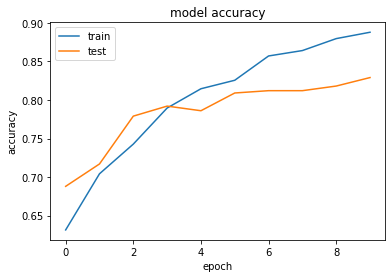

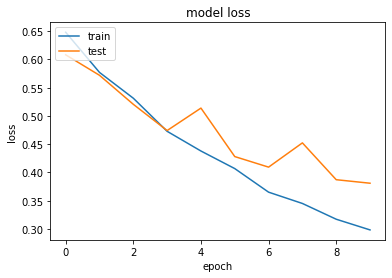

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Text Classification with Recurrent Neural Network (LSTM)

In [25]:
model1 = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model1.add(embedding_layer)
model1.add(LSTM(128))
model1.add(Dense(12, activation='sigmoid'))
model1.add(Dense(1, activation='sigmoid'))


model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model1.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          802900    
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_2 (Dense)             (None, 12)                1548      
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 921,709
Trainable params: 118,809
Non-trainable params: 802,900
_________________________________________________________________
None


In [26]:
history1 = model1.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)


Epoch 1/6
25/25 [==============================] - 10s 335ms/step - loss: 0.6428 - acc: 0.6328 - val_loss: 0.6112 - val_acc: 0.6675
Epoch 2/6
25/25 [==============================] - 8s 313ms/step - loss: 0.5695 - acc: 0.6869 - val_loss: 0.5831 - val_acc: 0.6825
Epoch 3/6
25/25 [==============================] - 8s 313ms/step - loss: 0.5499 - acc: 0.6847 - val_loss: 0.5355 - val_acc: 0.6963
Epoch 4/6
25/25 [==============================] - 10s 394ms/step - loss: 0.5137 - acc: 0.7175 - val_loss: 0.5162 - val_acc: 0.7237
Epoch 5/6
25/25 [==============================] - 8s 313ms/step - loss: 0.4923 - acc: 0.7506 - val_loss: 0.5229 - val_acc: 0.7163
Epoch 6/6
25/25 [==============================] - 8s 312ms/step - loss: 0.4589 - acc: 0.7775 - val_loss: 0.4734 - val_acc: 0.7763


In [27]:
score = model1.evaluate(X_test, y_test, verbose=1)

32/32 [==============================] - 1s 33ms/step - loss: 0.4631 - acc: 0.7850


In [28]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.46313467621803284
Test Accuracy: 0.7850000262260437


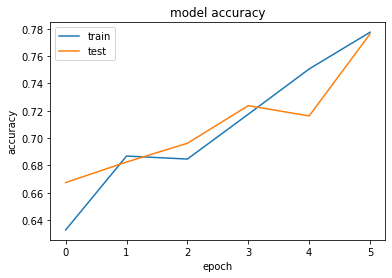

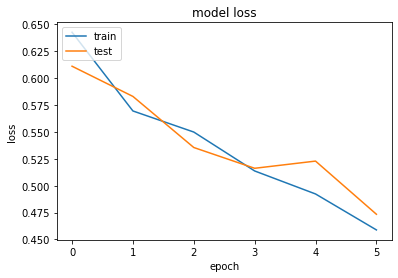

In [29]:
import matplotlib.pyplot as plt

plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Testing the Models.

In [70]:
# Enter tweet to predict sentiment
instance = "Rolex lovers are the worst people"
print(instance)
instance = tokenizer.texts_to_sequences(instance)

Rolex lovers are the worst people


In [68]:
# CNN Prediction

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

prediction = model.predict(instance)[0][0]
print(prediction)
# If the value is less than 0.5, the sentiment is considered negative where as if the value is greater than 0.5, the sentiment is considered as positive.
prediction = [1 if prediction > 0.5 else 0][0]
if prediction == 1:
  print(" Sentiment is Positive")
else:
  print(" Sentiment is Negative")

0.086802095
 Sentiment is Negative


In [69]:
# LSTM Prediction

flat_list = []
for sublist in instance:
    for item in sublist:
        flat_list.append(item)

flat_list = [flat_list]

instance = pad_sequences(flat_list, padding='post', maxlen=maxlen)

prediction = model1.predict(instance)[0][0]
print(prediction)
# If the value is less than 0.5, the sentiment is considered negative where as if the value is greater than 0.5, the sentiment is considered as positive.
prediction = [1 if prediction > 0.5 else 0][0]
if prediction == 1:
  print(" Sentiment is Positive")
else:
  print(" Sentiment is Negative")

0.3908896
 Sentiment is Negative
